Name: Muley, Tushar

Assignment: Week 3 Assignment 3.2

Date: June 27, 2021

Description: I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays).

In [1]:
#Load common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the file and move to dataframe
file = "dodger.csv"
df_dodger = pd.read_csv(file)

In [3]:
print("The dimension of the table is: ", df_dodger.shape)

The dimension of the table is:  (81, 12)


In [4]:
print(df_dodger.head(5))

  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  
0        NO         NO  
1        NO         NO  
2        NO         NO  
3       YES         NO  
4        NO         NO  


In [5]:
print("Describe Data")
print(df_dodger.describe())

Describe Data
             day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.000000


In [6]:
print("Summarized Data")
print(df_dodger.describe(include=['O']))

Summarized Data
       month day_of_week opponent   skies day_night cap shirt fireworks  \
count     81          81       81      81        81  81    81        81   
unique     7           7       17       2         2   2     2         2   
top      MAY    Saturday   Snakes  Clear      Night  NO    NO        NO   
freq      18          13        9      62        66  79    78        67   

       bobblehead  
count          81  
unique          2  
top            NO  
freq           70  


In [11]:
df_dodger.columns

Index(['month', 'day', 'attend', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'],
      dtype='object')

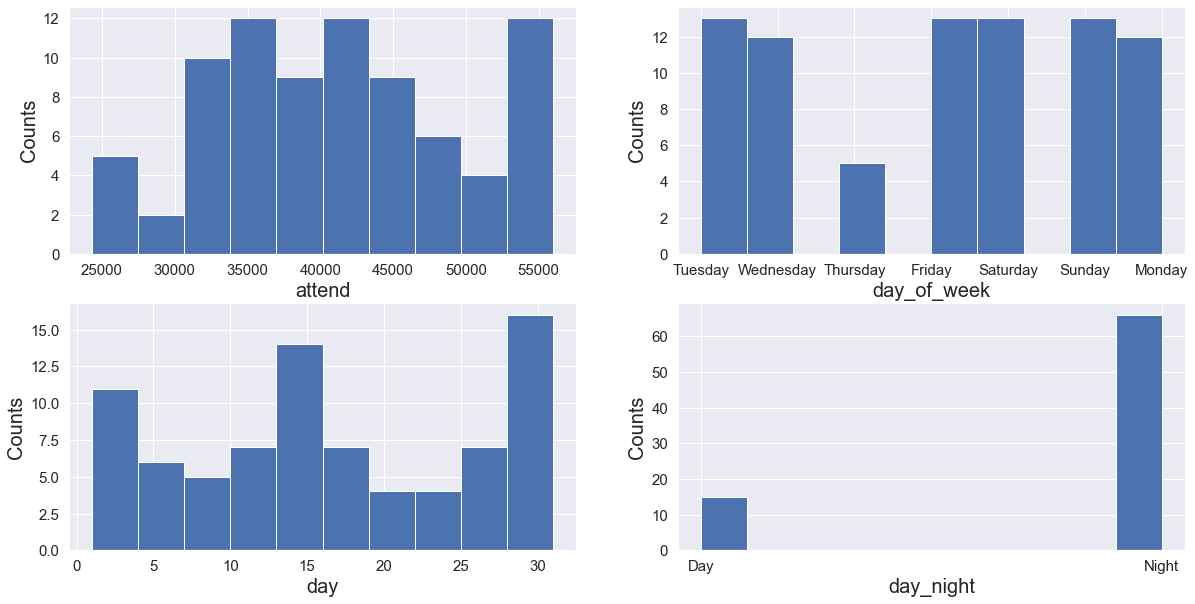

In [16]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['attend', 'day_of_week', 'day','day_night']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_dodger[num_features[idx]].dropna(), bins=10)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

Do the following:Box plots,Scatter plots & Regression Model

In [3]:
#Import seaborn
import seaborn as sns


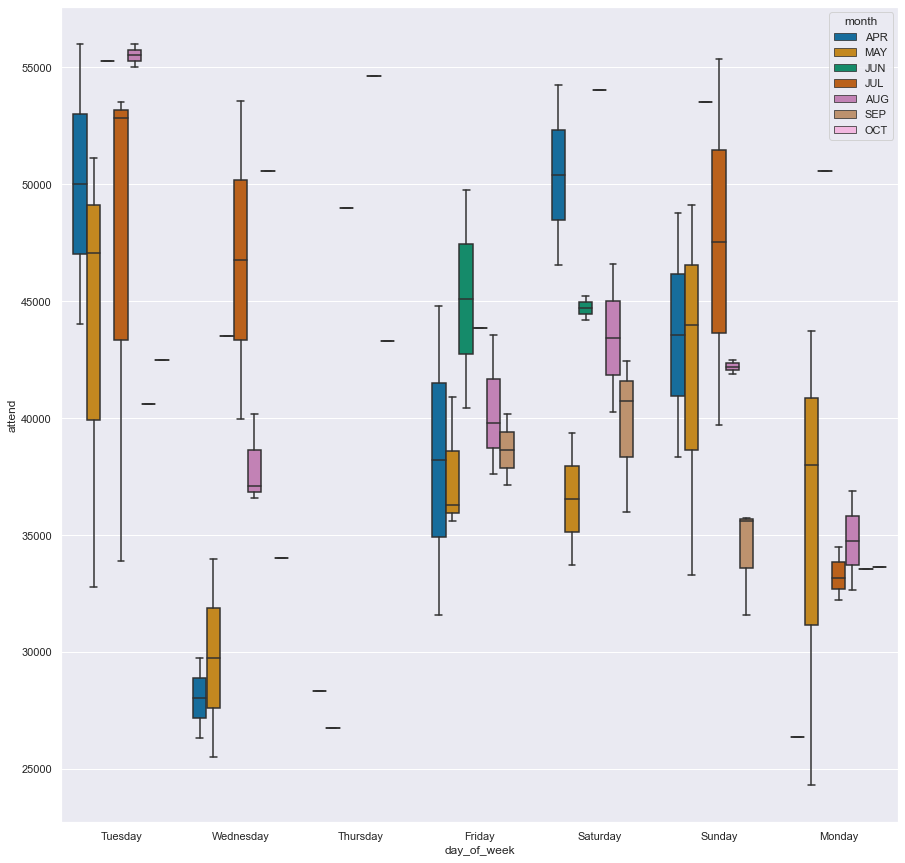

In [15]:
#boxplots
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(y='attend', x='day_of_week', 
                 data=df_dodger, 
                 palette='colorblind',
                 hue='month')

Based on the question - I would like you to determine what night would be the best to run a marketing promotion to increase attendance.

In [4]:
#Make a copy for later
df_dodger_copy_0 = df_dodger.copy(deep=True)

In [9]:
#Replace string with numbers day of week
df_dodger['day_of_week'] = df_dodger['day_of_week'].replace(['Sunday','Monday','Tuesday','Wednesday',
                                                                  'Thursday','Friday','Saturday'],[1,2,3,
                                                                                                   4,5,6,
                                                                                                   7])

#Print preview
df_dodger


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,3,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,4,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,5,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,6,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,7,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,7,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,1,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,2,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,3,Giants,83,Clear,Night,NO,NO,NO,NO


In [10]:
#Check the values of skie
df_dodger['skies'].value_counts()

Clear     62
Cloudy    19
Name: skies, dtype: int64

In [11]:
#Check the values for cap
df_dodger['cap'].value_counts()

NO     79
YES     2
Name: cap, dtype: int64

In [12]:
#Double check data types
df_dodger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     int64 
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(4), object(8)
memory usage: 7.7+ KB


In [13]:
#Clean up the NO and YES to 0 and 1 for all values
cleanup_nums = {'skies':{'Clear ': 0, 'Cloudy': 1},
                'cap': {'NO': 0, 'YES': 1},
                'shirt':{'NO':0,'YES':1},
                'fireworks':{'NO':0,'YES':1},
                'bobblehead':{'NO':0,'YES':1}}

In [14]:
#Run the code to clean it up
df_dodger = df_dodger.replace(cleanup_nums)
#Preview what came out
df_dodger.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,3,Pirates,67,0,Day,0,0,0,0
1,APR,11,29729,4,Pirates,58,1,Night,0,0,0,0
2,APR,12,28328,5,Pirates,57,1,Night,0,0,0,0
3,APR,13,31601,6,Padres,54,1,Night,0,0,1,0
4,APR,14,46549,7,Padres,57,1,Night,0,0,0,0


In [15]:
#Check value type of skies
df_dodger['skies'].value_counts()

0    62
1    19
Name: skies, dtype: int64

In [16]:
#Update data types to int
df_dodger['skies'] = df_dodger['skies'].astype('int')

#Check data types
df_dodger.dtypes

month          object
day             int64
attend          int64
day_of_week     int64
opponent       object
temp            int64
skies           int32
day_night      object
cap             int64
shirt           int64
fireworks       int64
bobblehead      int64
dtype: object

In [17]:
#Check the count of values
df_dodger['day_night'].value_counts()

Night    66
Day      15
Name: day_night, dtype: int64

In [18]:
#Clean up the NO and YES to 0 and 1 for all values
cleanup_dn = {'day_night':{'Night': 0, 'Day': 1}}

In [19]:
#Run the code to clean it up
df_dodger = df_dodger.replace(cleanup_dn)
#Preview what came out
df_dodger.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,3,Pirates,67,0,1,0,0,0,0
1,APR,11,29729,4,Pirates,58,1,0,0,0,0,0
2,APR,12,28328,5,Pirates,57,1,0,0,0,0,0
3,APR,13,31601,6,Padres,54,1,0,0,0,1,0
4,APR,14,46549,7,Padres,57,1,0,0,0,0,0


In [20]:
#Check data types
df_dodger.dtypes

month          object
day             int64
attend          int64
day_of_week     int64
opponent       object
temp            int64
skies           int32
day_night       int64
cap             int64
shirt           int64
fireworks       int64
bobblehead      int64
dtype: object

In [21]:
#Correlation Matrix
corr_matrix = df_dodger.corr()

In [22]:
#View the correlation Matrix
corr_matrix

,day,attend,day_of_week,temp,skies,day_night,cap,shirt,fireworks,bobblehead
day,1.000000,0.027093,0.160664,-0.127612,-0.038396,0.039828,-0.202274,-0.030182,0.099528,0.145363
attend,0.027093,1.000000,0.045177,0.098951,-0.150963,0.043544,-0.055002,0.133269,0.002094,0.581895
day_of_week,0.160664,0.045177,1.000000,-0.210856,0.173522,-0.455972,-0.147091,-0.181300,0.423744,-0.003203
temp,-0.127612,0.098951,-0.210856,1.000000,-0.316584,0.272141,0.064521,0.004394,-0.189899,0.049573
skies,-0.038396,-0.150963,0.173522,-0.316584,1.000000,-0.188903,0.099671,-0.108566,-0.021880,-0.049349
day_night,0.039828,0.043544,-0.455972,0.272141,-0.188903,1.000000,0.128951,0.074796,-0.217922,-0.188982
cap,-0.202274,-0.055002,-0.147091,0.064521,0.099671,0.128951,1.000000,-0.031204,-0.072732,-0.063074
shirt,-0.030182,0.133269,-0.181300,0.004394,-0.108566,0.074796,-0.031204,1.000000,-0.089648,-0.077743
fireworks,0.099528,0.002094,0.423744,-0.189899,-0.021880,-0.217922,-0.072732,-0.089648,1.000000,-0.181207
bobblehead,0.145363,0.581895,-0.003203,0.049573,-0.049349,-0.188982,-0.063074,-0.077743,-0.181207,1.000000


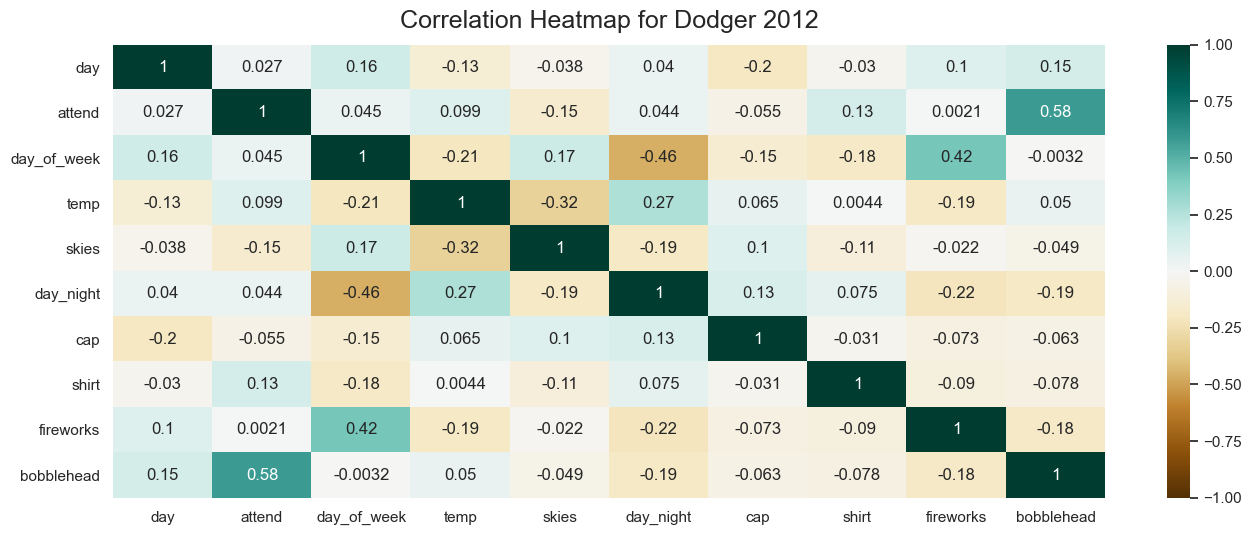

In [80]:
#Visual for Heatmap Correlation
plt.figure(figsize=(16, 6))
hm=sns.heatmap(df_dodger.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm.set_title('Correlation Heatmap for Dodger 2012', fontdict={'fontsize':18}, pad=12);

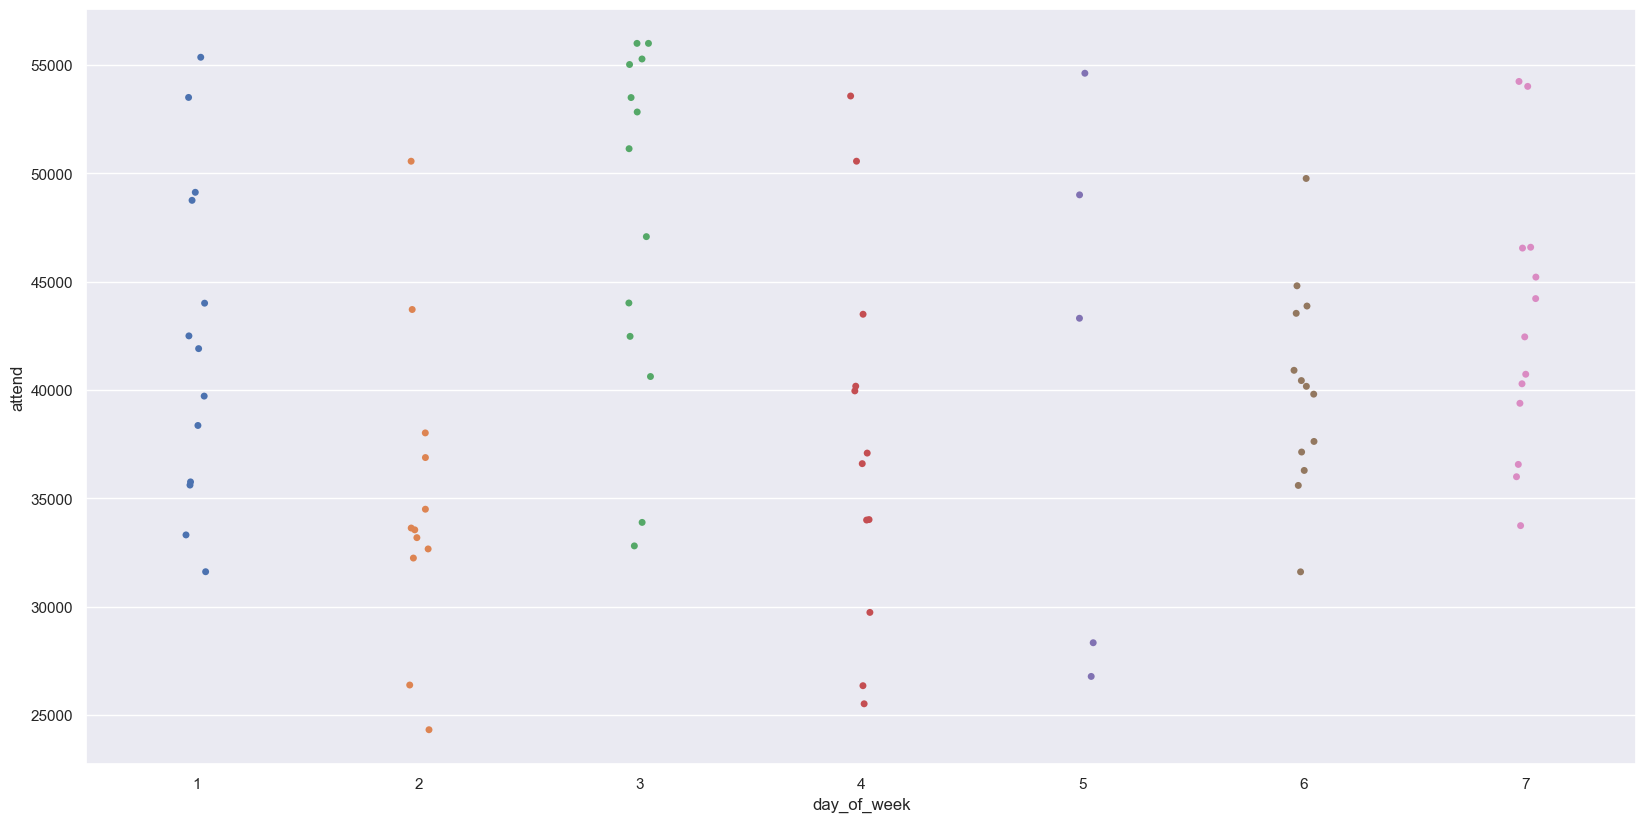

In [81]:
#sns.relplot(x='day_of_week', y='attend', data=df_dodger)
sns.stripplot('day_of_week', y='attend', data=df_dodger, jitter=0.05)

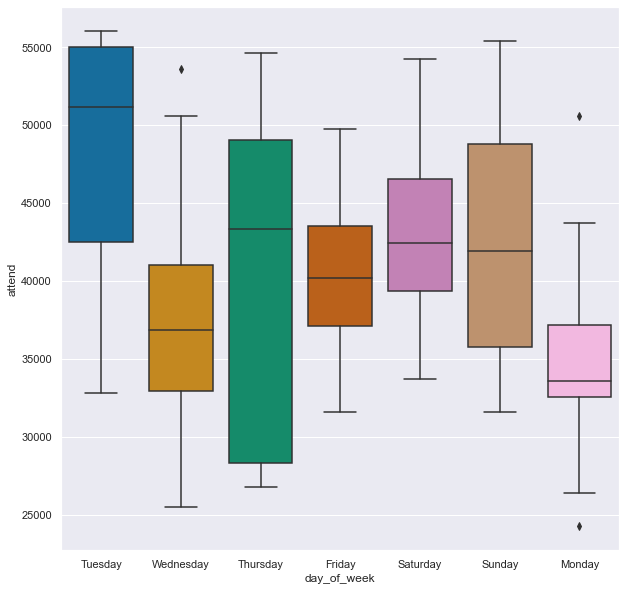

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(y='attend', x='day_of_week', 
                 data=df_dodger, 
                 palette='colorblind')

[Text(0, 0.5, 'Attendance'),
 Text(0.5, 0, 'Day of the Week'),
 Text(0.5, 1.0, 'Boxplot of Attendance with Bobblehead')]

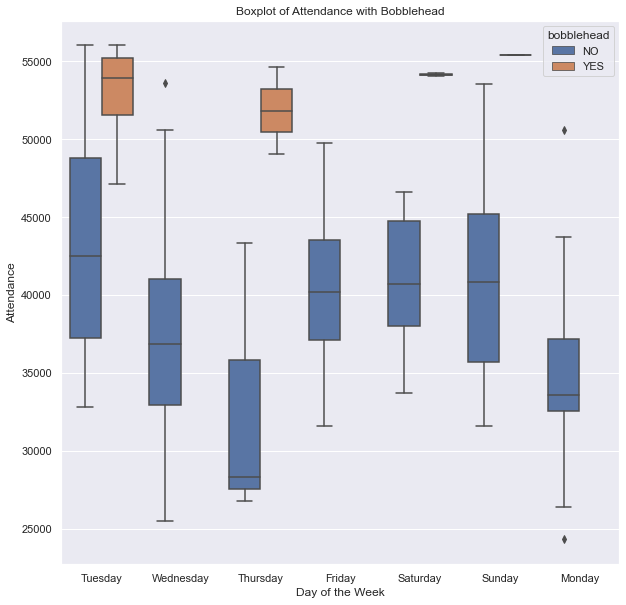

In [10]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(y='attend', x='day_of_week', 
                 data=df_dodger_copy_0, 
                 hue='bobblehead').set(
    xlabel='Day of the Week', 
    ylabel='Attendance',
    title='Boxplot of Attendance with Bobblehead')

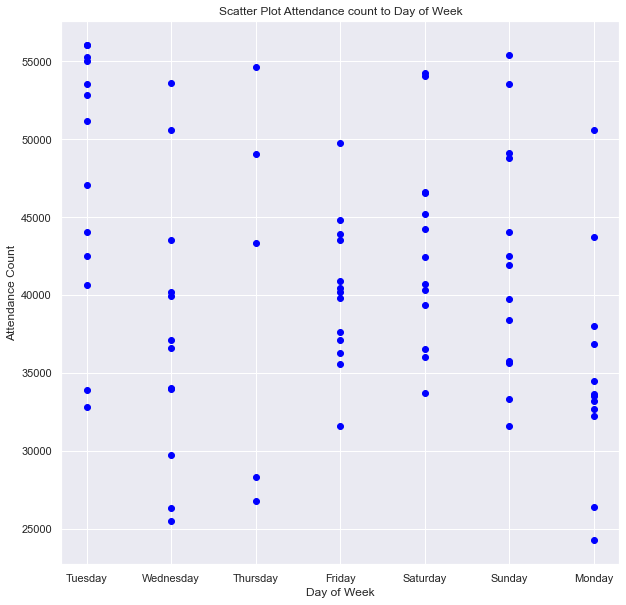

In [11]:
# Scatterplot - To check correlation
x = df_dodger["day_of_week"]
y = df_dodger["attend"]

# Plot
plt.scatter(x,y,color="blue")
plt.rcParams.update({"figure.figsize":(8,8), "figure.dpi":100})

#Labels
plt.title('Scatter Plot Attendance count to Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Attendance Count')
plt.show()

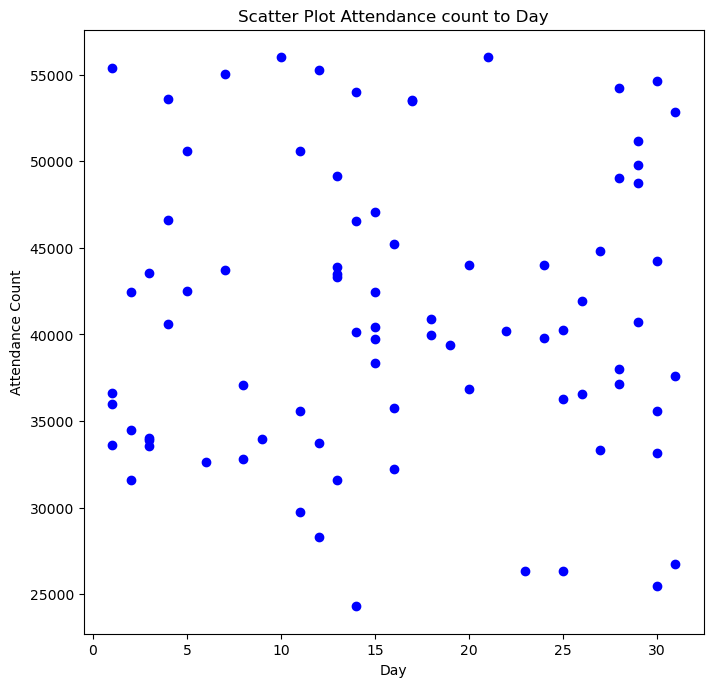

In [6]:
# Scatterplot - To check correlation
x = df_dodger["day"]
y = df_dodger["attend"]

# Plot
plt.scatter(x,y,color="blue")
plt.rcParams.update({"figure.figsize":(10,10), "figure.dpi":100})

#Labels
plt.title('Scatter Plot Attendance count to Day')
plt.xlabel('Day')
plt.ylabel('Attendance Count')
plt.show()

In [82]:
#Make a copy incase I need to return
df_dodger_copy_1 = df_dodger.copy(deep=True)

In [90]:
#Drop opponent
df_dodger = df_dodger.drop(['opponent'], axis=1)
df_dodger = df_dodger.drop(['month'], axis=1)
df_dodger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          81 non-null     int64
 1   attend       81 non-null     int64
 2   day_of_week  81 non-null     int64
 3   temp         81 non-null     int64
 4   skies        81 non-null     int32
 5   day_night    81 non-null     int64
 6   cap          81 non-null     int64
 7   shirt        81 non-null     int64
 8   fireworks    81 non-null     int64
 9   bobblehead   81 non-null     int64
dtypes: int32(1), int64(9)
memory usage: 6.1 KB


In [7]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression


In [9]:
X = df_dodger['day'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_dodger['attend'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

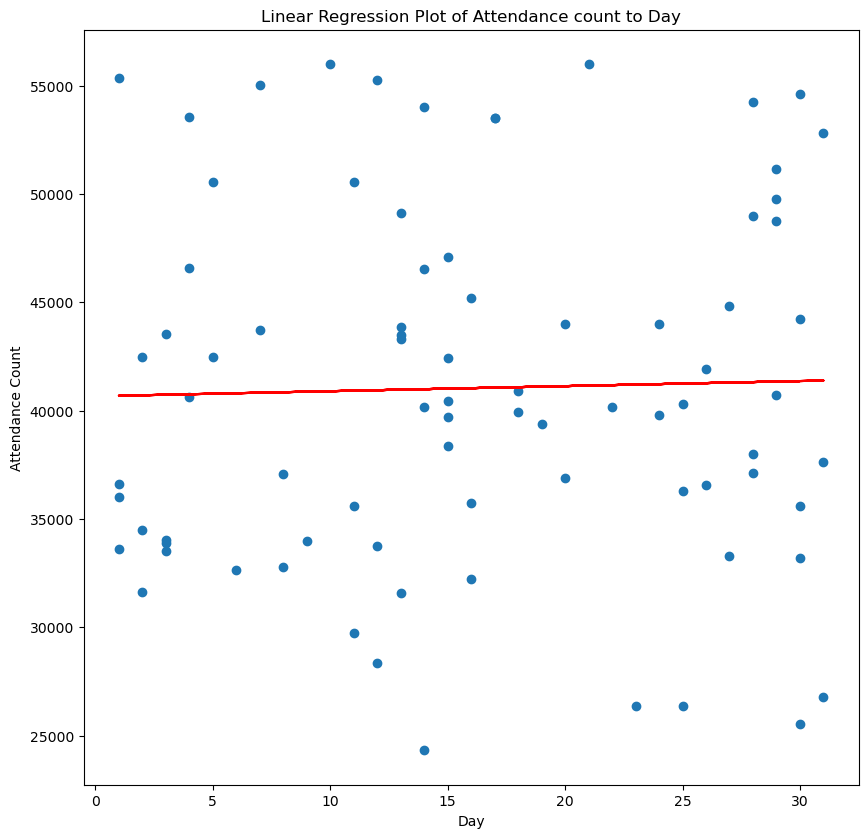

In [11]:
#Scatter Plot with prediction
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

#Labels
plt.title('Linear Regression Plot of Attendance count to Day')
plt.xlabel('Day')
plt.ylabel('Attendance Count')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print(regressor.intercept_)

41004.52856828934


In [19]:
print(regressor.coef_)

[-8.92328074]


In [30]:
y_pred = regressor.predict(X_test)

In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5875.409299900461
Mean Squared Error: 52735122.72298296
Root Mean Squared Error: 7261.895256954823


In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
22,44005,40264.958098
27,51137,40667.155788
61,39805,41270.452323
13,32799,40667.155788
71,43309,41069.353478
74,35754,40264.958098
30,50559,40466.056943
55,32659,40466.056943
53,46588,41471.551168
26,38016,40466.056943


In [13]:
#Make a copy for later
df_dodger_copy_1 = df_dodger.copy(deep=True)

In [14]:
#Get dummy variables for day of week
df_dodger_copy_1 = pd.get_dummies(df_dodger_copy_1, columns=['day_of_week'])

In [21]:
df_dodger_copy_1.head(23)

,month,day,attend,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,APR,10,56000,Pirates,67,Clear,Day,NO,NO,NO,NO,0,0,0,0,0,1,0
1,APR,11,29729,Pirates,58,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,0,1
2,APR,12,28328,Pirates,57,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,1,0,0
3,APR,13,31601,Padres,54,Cloudy,Night,NO,NO,YES,NO,1,0,0,0,0,0,0
4,APR,14,46549,Padres,57,Cloudy,Night,NO,NO,NO,NO,0,0,1,0,0,0,0
5,APR,15,38359,Padres,65,Clear,Day,NO,NO,NO,NO,0,0,0,1,0,0,0
6,APR,23,26376,Braves,60,Cloudy,Night,NO,NO,NO,NO,0,1,0,0,0,0,0
7,APR,24,44014,Braves,63,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,1,0
8,APR,25,26345,Braves,64,Cloudy,Night,NO,NO,NO,NO,0,0,0,0,0,0,1
9,APR,27,44807,Nationals,66,Clear,Night,NO,NO,YES,NO,1,0,0,0,0,0,0


In [25]:
df_thursdays = df_dodger[df_dodger['day_of_week'] == 'Thursday']

In [26]:
df_thursdays.sort_values(by=['day_of_week'])

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
29,MAY,31,26773,Thursday,Brewers,70,Clear,Night,NO,NO,NO,NO
36,JUN,28,49006,Thursday,Mets,75,Clear,Night,NO,NO,NO,YES
64,AUG,30,54621,Thursday,Snakes,80,Clear,Night,NO,NO,NO,YES
71,SEP,13,43309,Thursday,Cardinals,80,Clear,Night,NO,NO,NO,NO


In [27]:
df_dodger['day_of_week'].value_counts()

Friday       13
Tuesday      13
Sunday       13
Saturday     13
Wednesday    12
Monday       12
Thursday      5
Name: day_of_week, dtype: int64

In [29]:
df_mondays = df_dodger[df_dodger['day_of_week'] == 'Monday']
df_mondays.sort_values(by=['day_of_week'])

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
12,MAY,7,43713,Monday,Giants,67,Clear,Night,NO,NO,NO,NO
18,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,NO,NO
26,MAY,28,38016,Monday,Brewers,73,Clear,Night,NO,NO,NO,NO
30,JUN,11,50559,Monday,Angels,68,Clear,Night,NO,YES,NO,NO
40,JUL,2,34493,Monday,Reds,70,Clear,Night,NO,NO,NO,NO
46,JUL,16,32238,Monday,Phillies,67,Clear,Night,NO,NO,NO,NO
49,JUL,30,33180,Monday,Snakes,73,Clear,Night,NO,NO,NO,NO
55,AUG,6,32659,Monday,Rockies,79,Clear,Night,NO,NO,NO,NO
58,AUG,20,36878,Monday,Giants,80,Clear,Night,NO,NO,NO,NO
